In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore")

## Run `make_anomalies_tables.ipynb` first to create `../data/*_expert_anomalies.csv`

In [2]:
# M31
m31_oid = np.memmap('../data/oid_m31.dat', mode='r', dtype=np.uint64)
m31_names = open('../data/feature_m31.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
m31_dtype = [(name, np.float32) for name in m31_names]
m31_x = np.memmap('../data/feature_m31.dat', mode='r', dtype=m31_dtype, shape=m31_oid.shape)


# Disk
disk_oid = np.memmap('../data/oid_disk.dat', mode='r', dtype=np.uint64)
disk_names = open('../data/feature_disk.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
disk_dtype = [(name, np.float32) for name in disk_names]
disk_x = np.memmap('../data/feature_disk.dat', mode='r', dtype=disk_dtype, shape=disk_oid.shape)


# Deep
deep_oid = np.memmap('../data/oid_deep.dat', mode='r', dtype=np.uint64)
deep_names = open('../data/feature_deep.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
deep_dtype = [(name, np.float32) for name in deep_names]
deep_x = np.memmap('../data/feature_deep.dat', mode='r', dtype=deep_dtype, shape=deep_oid.shape)

In [3]:
# #updated from ANOMALIES_PAD 11/23/2020

m31_anom_tab = pd.read_csv('../data/m31_expert_anomalies.csv', index_col='oid')
disk_anom_tab = pd.read_csv('../data/disk_expert_anomalies.csv', index_col='oid')
deep_anom_tab = pd.read_csv('../data/deep_expert_anomalies.csv', index_col='oid')

In [4]:
m31_anom_tab

amplitude  beyond_1_std  beyond_2_std     cusum       eta  \
oid                                                                          
695211200058391   1.080000      0.330097      0.038835  0.395421  0.336107   
695211200035023   0.919500      0.187500      0.086538  0.372327  0.135560   
695211400009049   0.763500      0.428571      0.000000  0.438763  0.194513   
695211400046832   0.979000      0.145631      0.029126  0.224395  0.786437   
695211400027347   0.967000      0.366972      0.018349  0.430793  0.301353   
695211200022958   0.276500      0.426877      0.007905  0.316703  0.200190   
695211200077906   0.337501      0.120253      0.094937  0.208027  1.148685   
695211400025927   0.701500      0.297030      0.039604  0.333839  0.780629   
695211200057718   0.928000      0.326389      0.027778  0.416115  0.243381   
695211100015190   0.981999      0.138211      0.081301  0.353806  0.233171   

                       eta_e  inter_percentile_range_25  \
oid                                                       
695211200058391   96941336.0                   0.565500   
695211200035023  220374260.0                   0.467499   
695211400009049   72289330.0                   0.808002   
695211400046832  295042620.0                   0.212999   
695211400027347  587397300.0                   0.823999   
695211200022958  458107300.0                   0.263001   
695211200077906  528294300.0                   0.029001   
695211400025927  337253700.0                   0.323002   
695211200057718  404207460.0                   0.675501   
695211100015190  137418660.0                   0.464251   

                 inter_percentile_range_10   kurtosis  linear_fit_slope  \
oid                                                                       
695211200058391                   1.034199   0.377343         -0.017752   
695211200035023                   1.099400   1.052788         -0.002589   
695211400009049                   1.165999  -1.336752          0.011980   
695211400046832                   0.440001  18.727877          0.002106   
695211400027347                   1.278200  -1.090405          0.011836   
695211200022958                   0.383400  -1.206424          0.000506   
695211200077906                   0.371799   3.835977         -0.001096   
695211400025927                   0.626799   0.552218          0.014561   
695211200057718                   1.319599  -0.692586         -0.001005   
695211100015190                   0.811600   2.162920          0.005433   

                     ...        periodogram_cusum  periodogram_eta  \
oid                  ...                                             
695211200058391      ...                 0.134401         0.022435   
695211200035023      ...                 0.111273         0.020920   
695211400009049      ...                 0.093476         0.017952   
695211400046832      ...                 0.082955         0.139150   
695211400027347      ...                 0.105503         0.013193   
695211200022958      ...                 0.102072         0.020381   
695211200077906      ...                 0.173981         0.040965   
695211400025927      ...                 0.140121         0.027622   
695211200057718      ...                 0.094246         0.017760   
695211100015190      ...                 0.169431         0.049908   

                 periodogram_inter_percentile_range_25  \
oid                                                      
695211200058391                               0.874175   
695211200035023                               0.829133   
695211400009049                               1.078872   
695211400046832                               0.902825   
695211400027347                               0.861321   
695211200022958                               0.743957   
695211200077906                               1.204176   
695211400025927                               0.623367   
695211200057718                               1.0

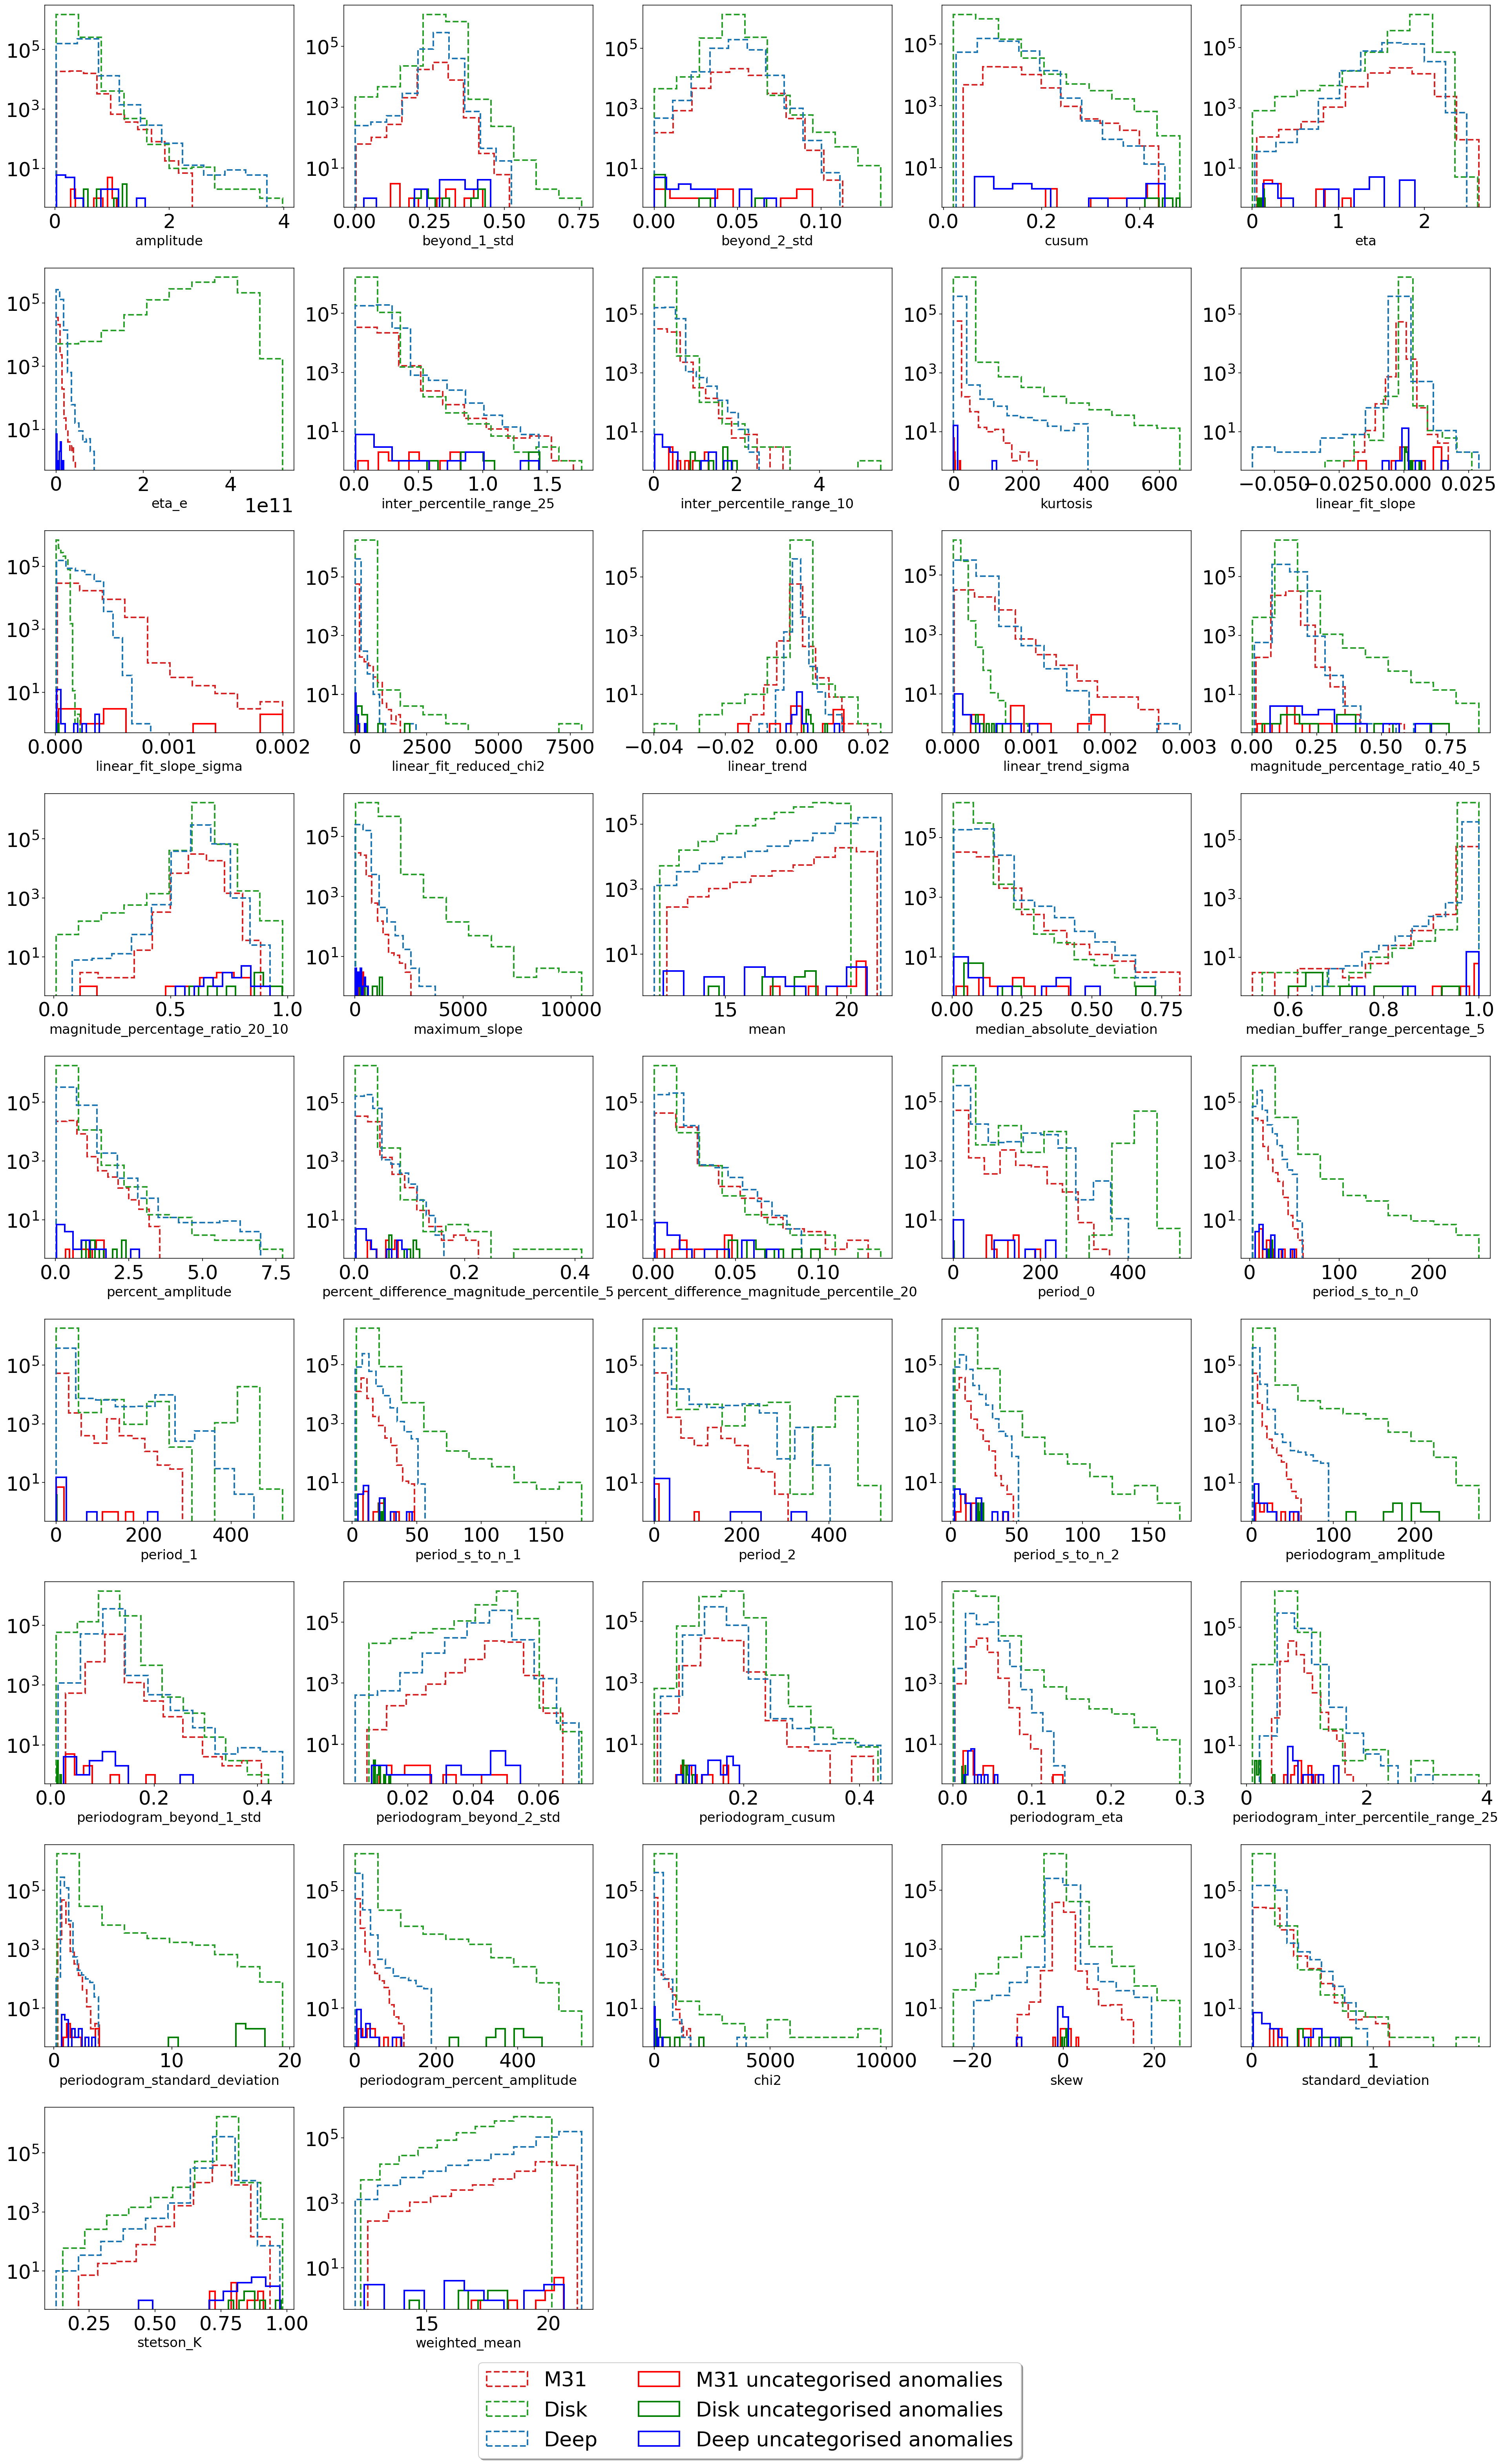

In [5]:
fig = plt.figure(figsize=(33, 54))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.rcParams.update({'font.size': 25})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='tab:red', 
             linestyle='dashed', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='tab:green', 
             linestyle='dashed', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='tab:blue', 
             linestyle='dashed', linewidth=2, label='Deep')
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 uncategorised anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk uncategorised anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep uncategorised anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(r'{}'.format(f), fontsize=17)
    ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')

plt.legend(loc='center left', bbox_to_anchor=(0.5, -0.5), ncol=2, fancybox=True, shadow=True, fontsize=26)

fig.tight_layout()
fig.savefig('../figs/histograms/all_features_histogram_uncat_anomalies.png', format='png', bbox_inches='tight', dpi=300)

# PLOT 3 MOST IMPORTANT FEATURES (MOST IMPORTANT FROM 1st THREE PRINCIPAL COMPONENT)

In [6]:
three_most_important_features = ['standard_deviation', 'periodogram_amplitude', 'chi2']

<Figure size 432x288 with 0 Axes>

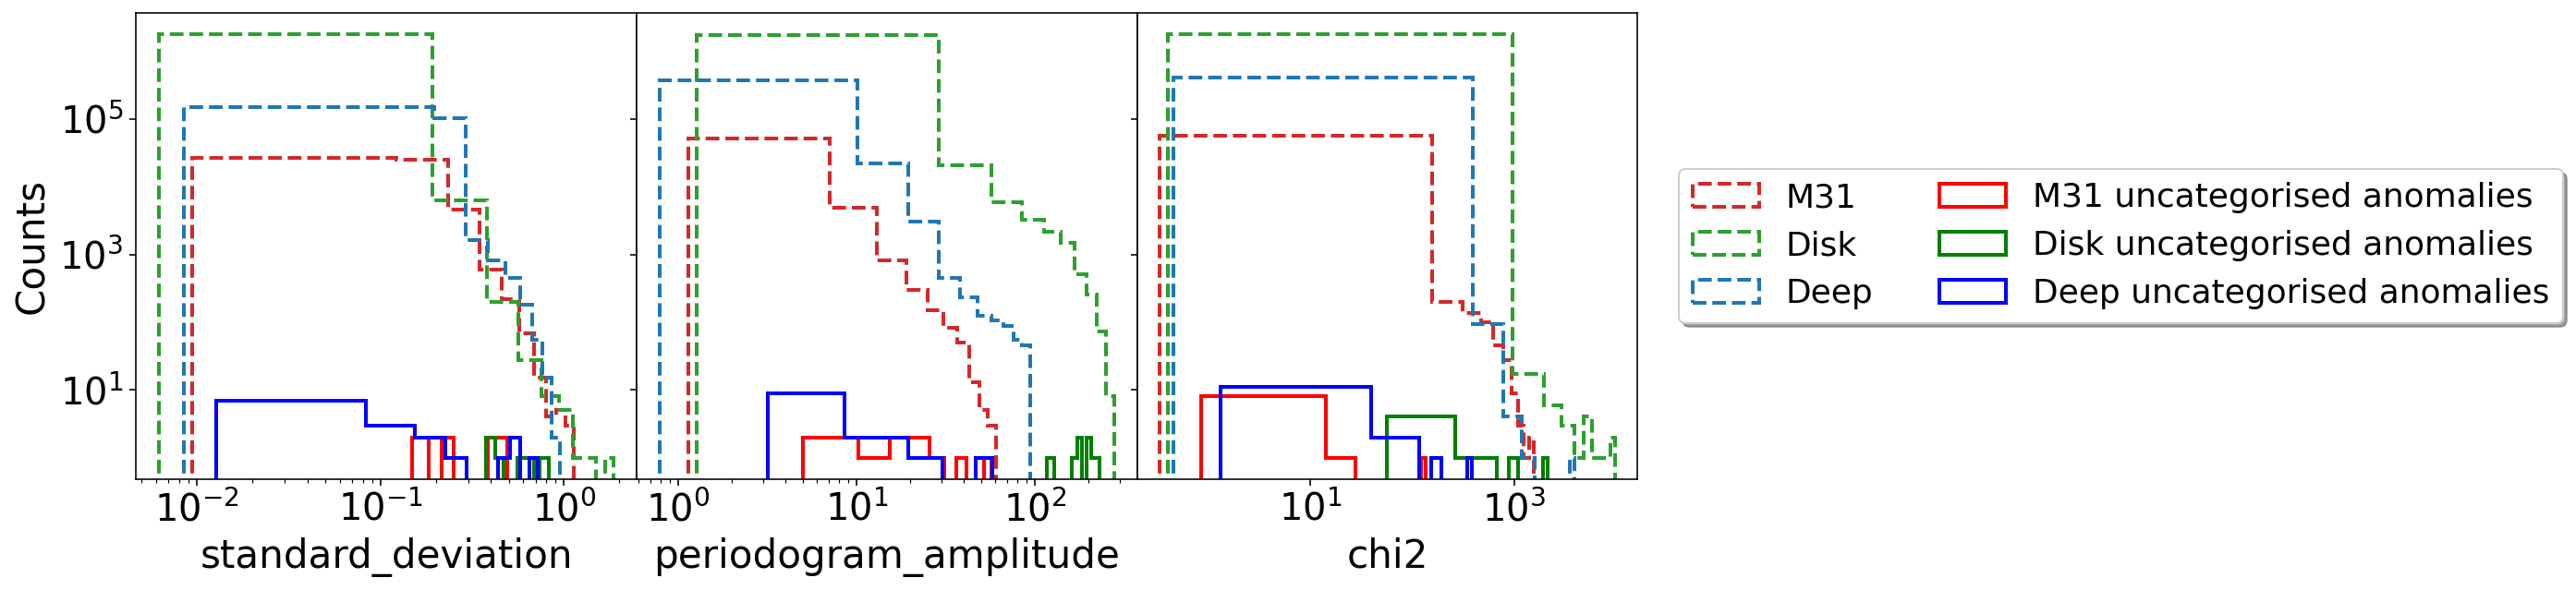

In [7]:
plt.clf()
fig, (axarr, axarr2, axarr3) = plt.subplots(1, 3, gridspec_kw = {'wspace':0, 'hspace':0}, sharey=True, figsize=(20, 5))

for i, (ax, f) in enumerate(zip(fig.axes, three_most_important_features)):
    ax.hist(m31_x['{}'.format(f)], histtype='step', color='tab:red', 
             linestyle='dashed', linewidth=2, label='M31')
    ax.hist(disk_x['{}'.format(f)], histtype='step', color='tab:green', 
             linestyle='dashed', linewidth=2, label='Disk')
    ax.hist(deep_x['{}'.format(f)], histtype='step', color='tab:blue', 
             linestyle='dashed', linewidth=2, label='Deep')
    ax.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 uncategorised anomalies')
    ax.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk uncategorised anomalies')
    ax.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep uncategorised anomalies')

    axarr.set_ylabel('Counts', fontsize=21)
    ax.set_xlabel(r'{}'.format(f), fontsize=21)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, fancybox=True, shadow=True, fontsize=18)
fig.tight_layout();

fig.savefig('../figs/histograms/three_most_important_features_uncat_anomalies.png', format='png', bbox_inches='tight', dpi=300)

# Plot artefacts and interesting objects of outliers lists only

In [8]:
m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list= m31_maria_list.set_index('oid')

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list= disk_maria_list.set_index('oid')

deep_maria_list = pd.read_csv('../data/deep_maria.csv', encoding='latin-1')
deep_maria_list= deep_maria_list.set_index('oid')

## Below are outliers tables (incl. artefacts), not expert anomalies (no incl. artefacts)!

m31_outlier_tab = pd.read_csv('../data/m31_outliers_table.csv', index_col='oid')
disk_outlier_tab = pd.read_csv('../data/disk_outliers_table.csv', index_col='oid')
deep_outlier_tab = pd.read_csv('../data/deep_outliers_table.csv', index_col='oid')

In [9]:
m31_full_tab = pd.concat([m31_outlier_tab, m31_maria_list], axis=1)
disk_full_tab = pd.concat([disk_outlier_tab, disk_maria_list], axis=1)
deep_full_tab = pd.concat([deep_outlier_tab, deep_maria_list], axis=1)

m31_full_tab.head()

amplitude  beyond_1_std  beyond_2_std     cusum       eta  \
oid                                                                          
695211400034403     2.3800      0.293706      0.048951  0.210137  1.039928   
695211400124577     2.0445      0.358025      0.006173  0.203197  1.588497   
695211400102351     2.3620      0.396694      0.024793  0.155299  1.549895   
695211400053697     2.2125      0.310000      0.080000  0.229030  1.349776   
695211200075348     1.1080      0.458333      0.013889  0.400897  0.117357   

                        eta_e  inter_percentile_range_25  \
oid                                                        
695211400034403  1.205708e+09                   1.702999   
695211400124577  2.624290e+09                   1.459000   
695211400102351  2.136628e+09                   1.404751   
695211400053697  4.898475e+08                   1.032000   
695211200075348  2.367448e+07                   1.024000   

                 inter_percentile_range_10  kurtosis  linear_fit_slope  \
oid                                                                      
695211400034403                   2.813601 -0.436671         -0.000443   
695211400124577                   3.120001 -0.784893         -0.003234   
695211400102351                   3.065599 -0.579718          0.001458   
695211400053697                   2.337502  0.153038          0.000263   
695211200075348                   1.484999 -1.029066          0.017021   

                    ...             chi2      skew  standard_deviation  \
oid                 ...                                                  
695211400034403     ...      1568.272300  0.410859            1.097088   
695211400124577     ...      1209.481200  0.397880            1.082259   
695211400102351     ...       747.957150  0.321721            1.132575   
695211400053697     ...      1371.101700  0.280188            0.917519   
695211200075348     ...        12.322401  0.163349            0.557800   

                 stetson_K  weighted_mean  #       tag  tag_detailed  \
oid                                                                    
695211400034403   0.875042      16.457632  0  artefact   bright star   
695211400124577   0.903058      16.626255  1  artefact   bright star   
695211400102351   0.900564      17.092886  2  artefact   bright star   
695211400053697   0.851317      16.688284  3  artefact   bright star   
695211200075348   0.902715      20.001472  4       Var           NaN   

                                                          Comments  Unnamed: 5  
oid                                                                             
695211400034403                                                NaN         NaN  
695211400124577                                                NaN         NaN  
695211400102351                                                NaN         NaN  
695211400053697                                                NaN         NaN  
695211200075348  MASTER OT J004126.22+414350.0 (ATel #9470). Th...         NaN  

[5 rows x 47 columns]

In [10]:
m31_artefacts = m31_full_tab[m31_full_tab.tag == 'artefact']
m31_interesting = m31_full_tab[m31_full_tab.tag != 'artefact']

disk_artefacts = disk_full_tab[disk_full_tab.tag == 'artefact']
disk_interesting = disk_full_tab[disk_full_tab.tag != 'artefact']

deep_artefacts = deep_full_tab[deep_full_tab.tag == 'artefact']
deep_interesting = deep_full_tab[deep_full_tab.tag != 'artefact']

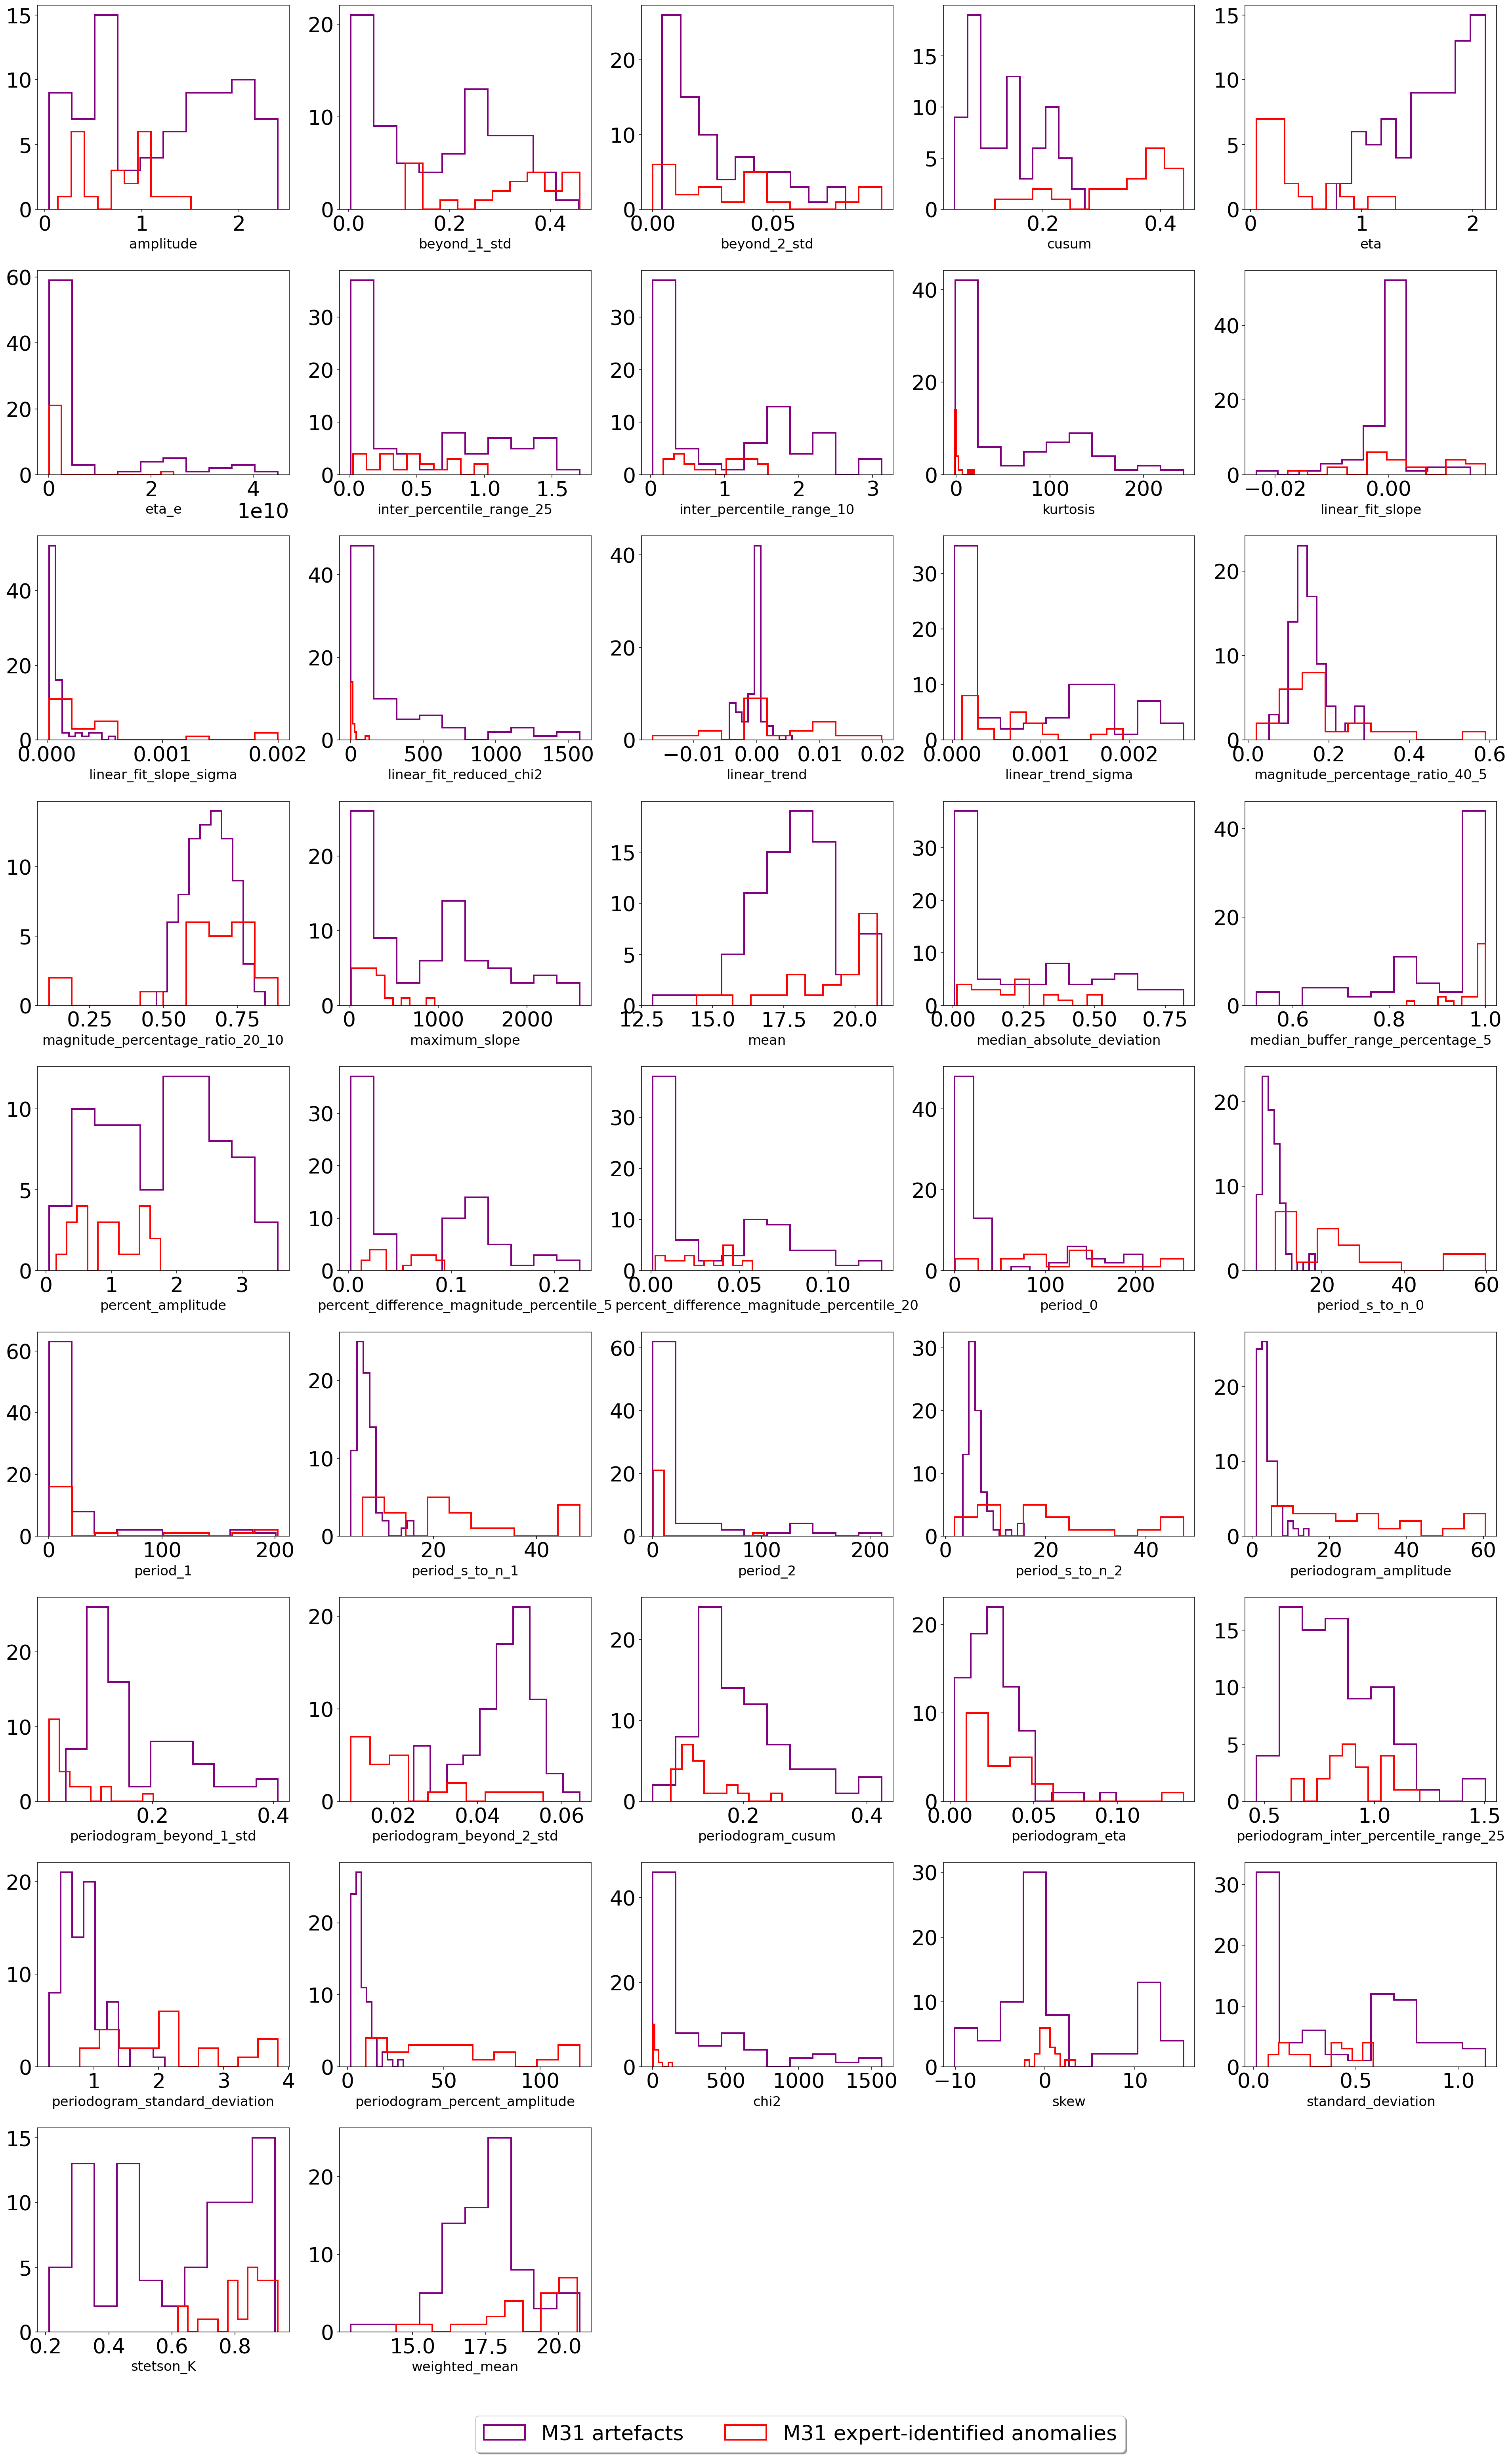

In [11]:
fig = plt.figure(figsize=(33, 54))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.rcParams.update({'font.size': 26})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_artefacts['{}'.format(f)], histtype='step', color='purple', linewidth=2, label='M31 artefacts')
    plt.hist(m31_interesting['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(r'{}'.format(f), fontsize=17)
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(0.5, -0.5), ncol=2, fancybox=True, shadow=True, fontsize=26)

fig.tight_layout()
fig.savefig('../figs/histograms/m31_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

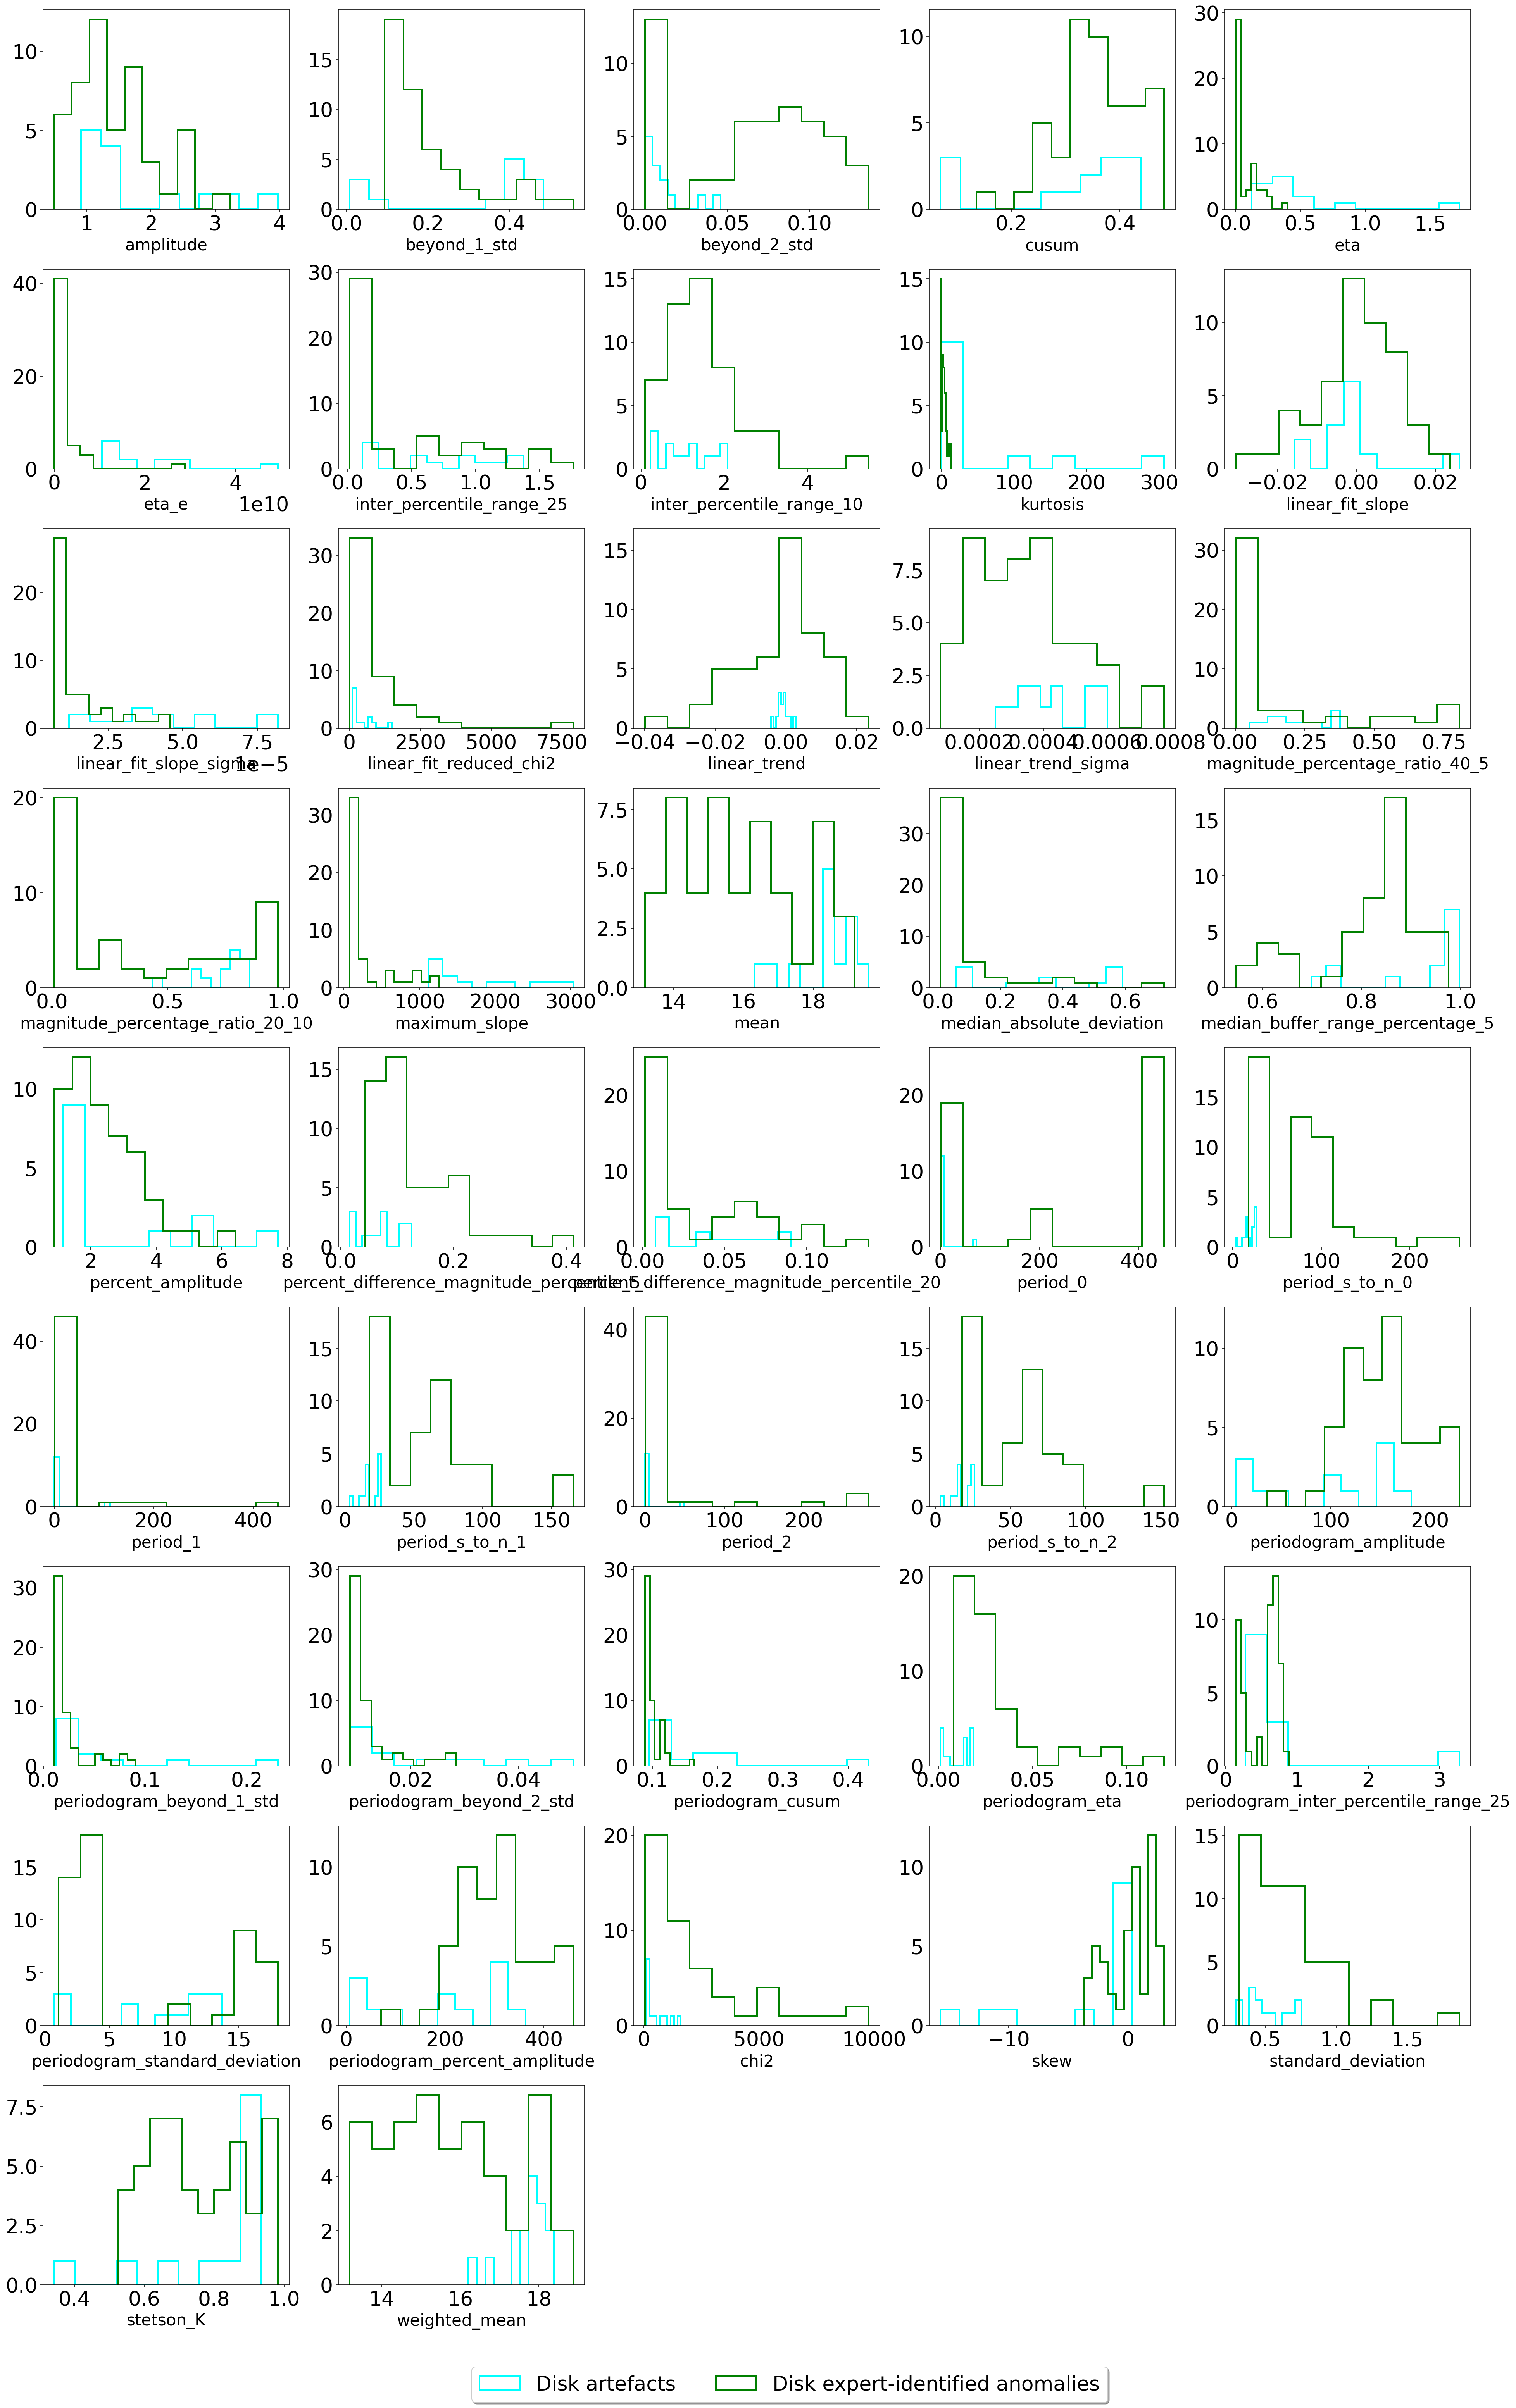

In [12]:
fig = plt.figure(figsize=(33, 54))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.rcParams.update({'font.size': 26})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(disk_artefacts['{}'.format(f)], histtype='step', color='cyan', linewidth=2, label='Disk artefacts')
    plt.hist(disk_interesting['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(r'{}'.format(f), fontsize=17)
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(0.5, -0.5), ncol=2, fancybox=True, shadow=True, fontsize=26)

fig.tight_layout()
fig.savefig('../figs/histograms/disk_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

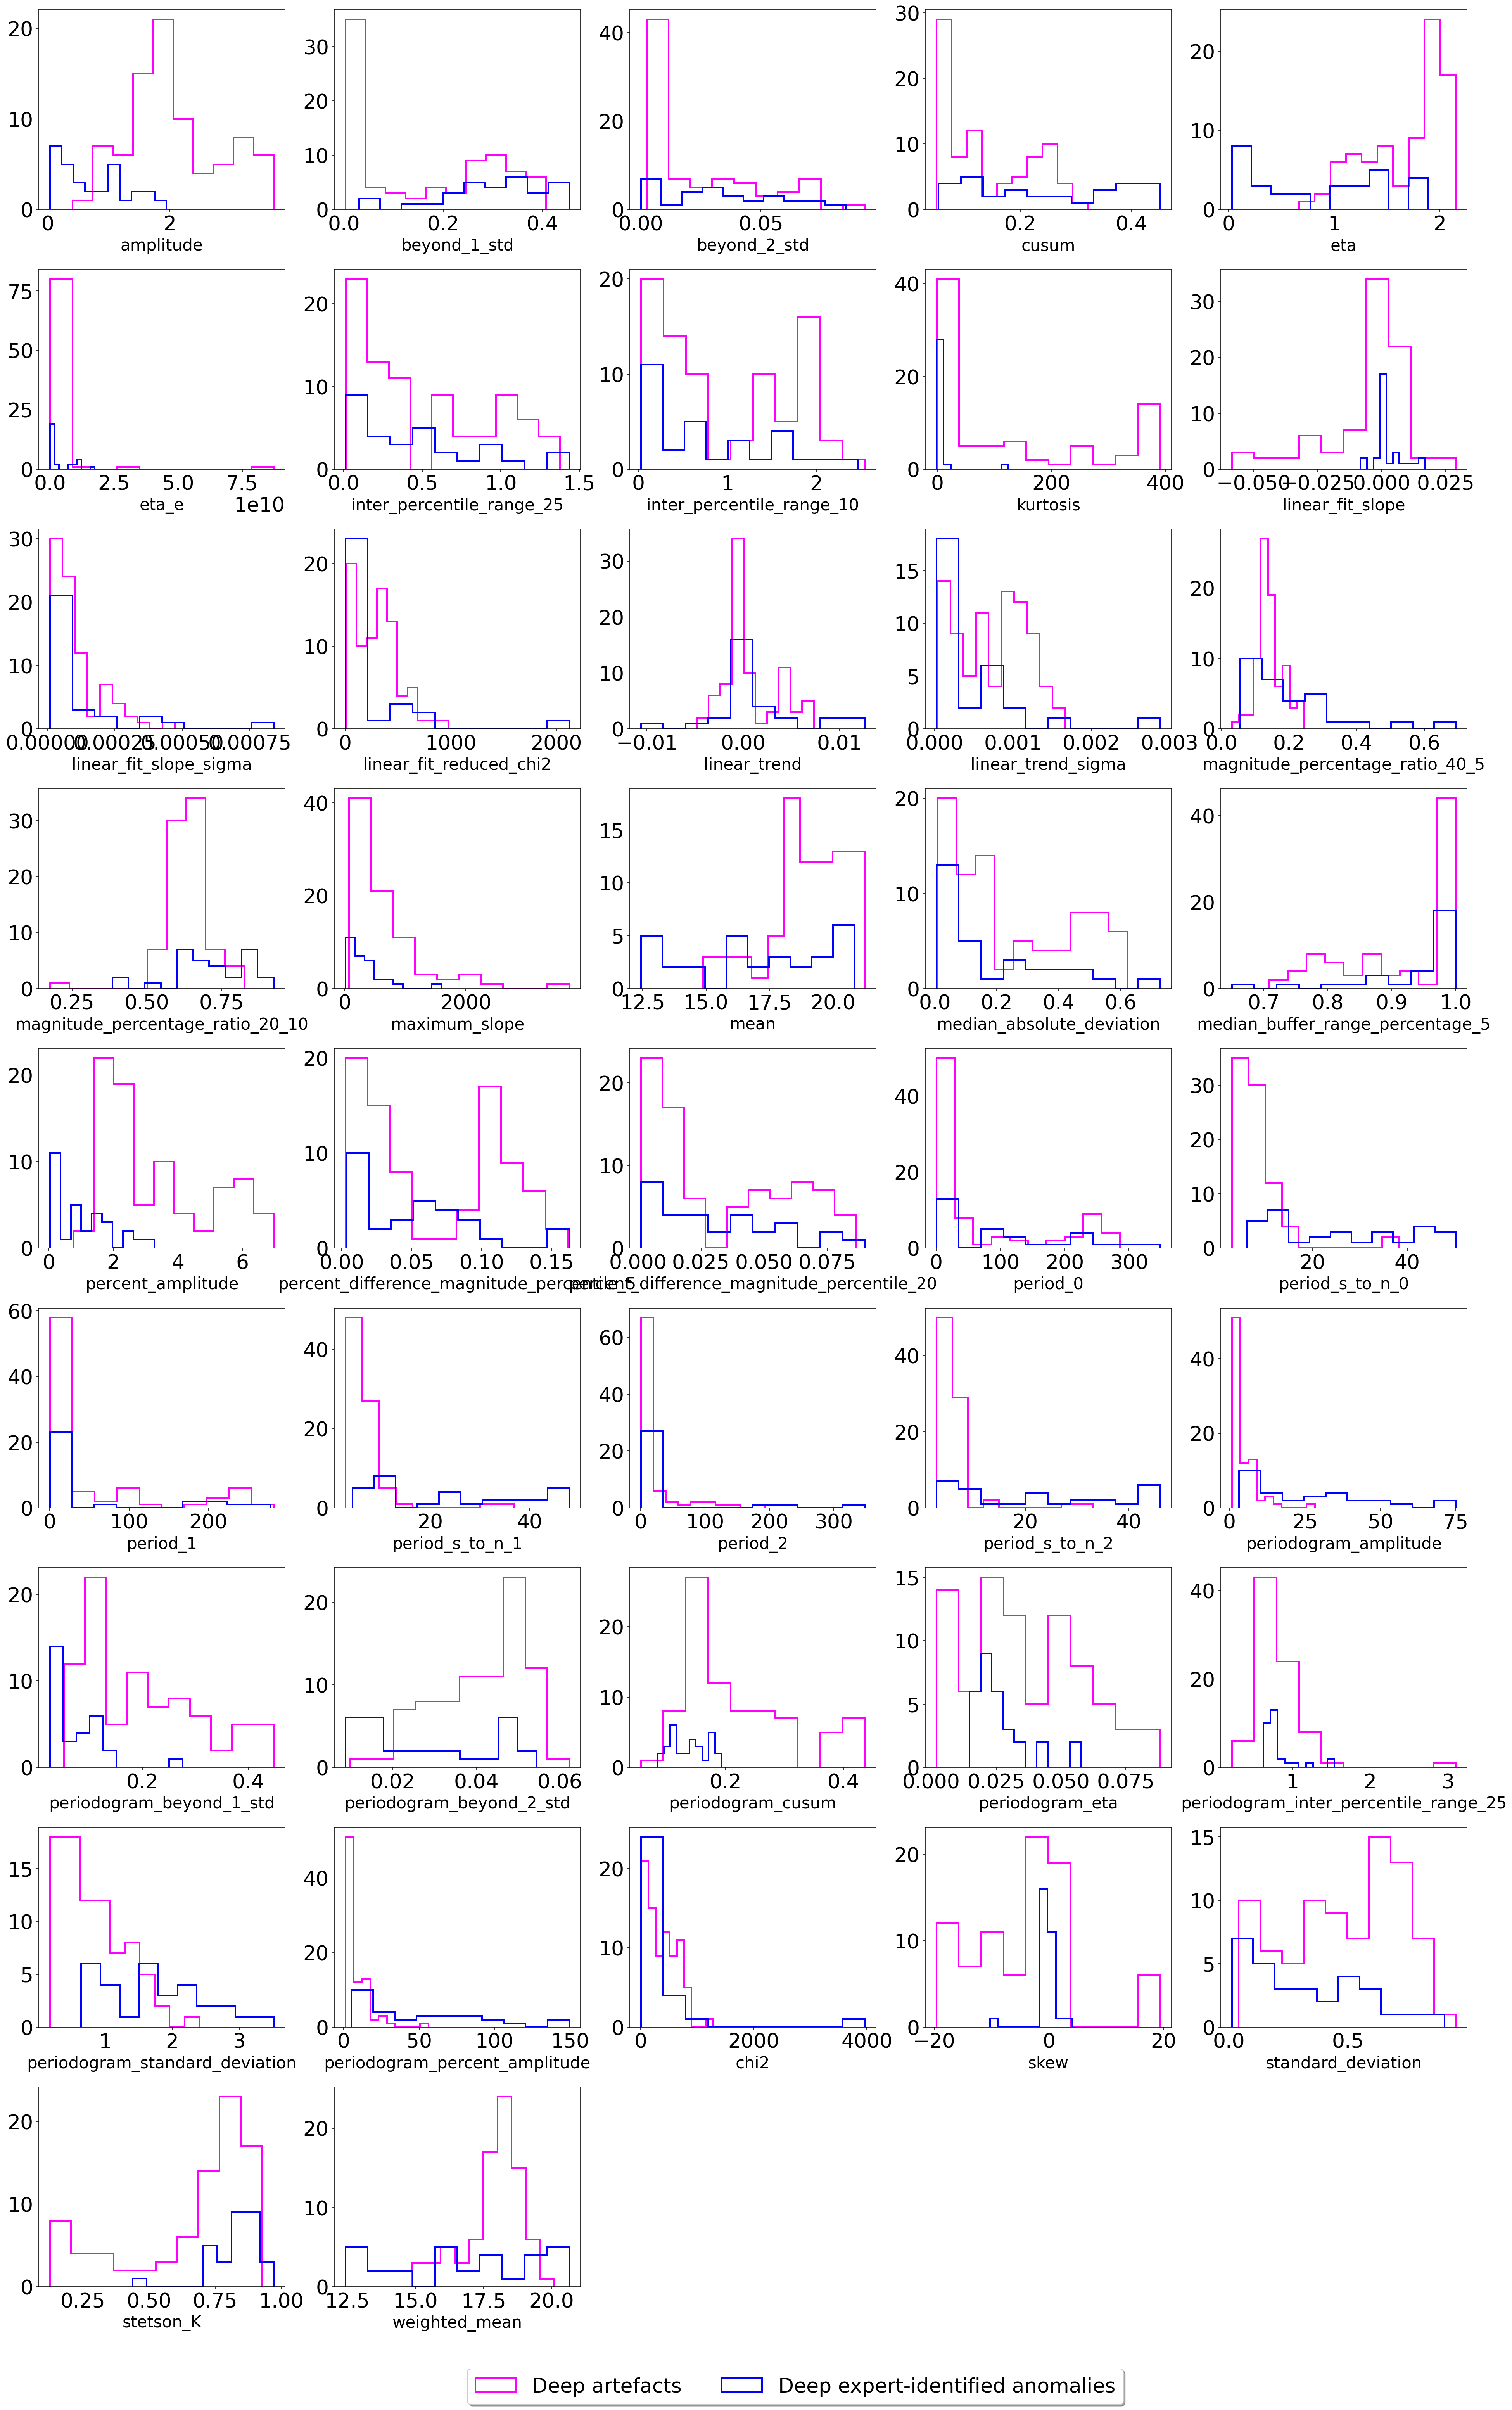

In [13]:
fig = plt.figure(figsize=(33, 54))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.rcParams.update({'font.size': 26})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(deep_artefacts['{}'.format(f)], histtype='step', color='magenta', linewidth=2, label='Deep artefacts')
    plt.hist(deep_interesting['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(r'{}'.format(f), fontsize=17)
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(0.5, -0.5), ncol=2, fancybox=True, shadow=True, fontsize=26)

fig.tight_layout()
fig.savefig('../figs/histograms/deep_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

# REPEAT FOR OUTLIERS HISTOGRAMS!!

In [3]:
# #updated from ANOMALIES_PAD 11/23/2020

m31_outliers_tab = pd.read_csv('../data/m31_outliers_table.csv', index_col='oid')
disk_outliers_tab = pd.read_csv('../data/disk_outliers_table.csv', index_col='oid')
deep_outliers_tab = pd.read_csv('../data/deep_outliers_table.csv', index_col='oid')

In [4]:
m31_outliers_tab

amplitude  beyond_1_std  beyond_2_std     cusum       eta  \
oid                                                                          
695211400034403   2.380000      0.293706      0.048951  0.210137  1.039928   
695211400124577   2.044500      0.358025      0.006173  0.203197  1.588497   
695211400102351   2.362000      0.396694      0.024793  0.155299  1.549895   
695211400053697   2.212500      0.310000      0.080000  0.229030  1.349776   
695211200075348   1.108000      0.458333      0.013889  0.400897  0.117357   
695211400000352   2.400000      0.288288      0.045045  0.160094  1.602353   
695211400088968   1.766000      0.335938      0.015625  0.237473  0.970532   
695211400117334   2.017000      0.304000      0.040000  0.225917  1.219688   
695211400028274   2.113000      0.318519      0.044444  0.155424  1.620563   
695211400133827   2.180000      0.370000      0.020000  0.268216  0.931083   
695211400053352   1.759000      0.268908      0.025210  0.150458  1.615414   
695211400048384   1.607000      0.274510      0.039216  0.248992  1.548758   
695211100022045   1.306000      0.281818      0.054545  0.372344  0.192495   
695211200009221   0.809999      0.003937      0.003937  0.061779  2.018154   
695211200020939   0.723500      0.007968      0.007968  0.074342  1.987363   
695211100002984   0.665501      0.062176      0.010363  0.087551  2.022660   
695211200058391   1.080000      0.330097      0.038835  0.395421  0.336107   
695211400132963   1.967500      0.296000      0.048000  0.225185  1.168623   
695211400121607   1.044000      0.361111      0.000000  0.435610  0.365767   
695211400130264   2.164500      0.272727      0.060606  0.207770  1.506238   
695211200035023   0.919500      0.187500      0.086538  0.372327  0.135560   
695211400009049   0.763500      0.428571      0.000000  0.438763  0.194513   
695211400134262   2.084000      0.338462      0.030769  0.189452  1.651187   
695211400070144   0.763000      0.406250      0.005208  0.401009  0.054155   
695211100003383   0.992500      0.370861      0.019868  0.391718  0.171532   
695211400134258   1.350500      0.456897      0.017241  0.146560  1.712943   
695211400134417   1.609000      0.343284      0.037313  0.155186  1.726034   
695211300004359   1.507501      0.314050      0.041322  0.383298  0.239697   
695211400134778   1.460000      0.281553      0.077670  0.165543  1.576296   
695211400134621   2.072000      0.222222      0.042735  0.205176  1.286780   
...                    ...           ...           ...       ...       ...   
695211200000865   0.494499      0.089686      0.004484  0.089246  1.856808   
695211100008614   0.360001      0.093264      0.010363  0.093381  1.965828   
695211100011888   1.333000      0.136752      0.008547  0.115323  1.828203   
695211100003209   0.191000      0.207254      0.005181  0.087586  1.882163   
695211100002099   1.191000      0.131579      0.019737  0.094212  1.738165   
695211300006331   0.338500      0.111940      0.089552  0.182777  0.820810   
695211400018326   0.532500      0.057269      0.008811  0.054638  2.029909   
695211100020857   1.225000      0.140351      0.017544  0.096949  1.778670   
695211100025106   0.124001      0.239583      0.020833  0.133989  1.792497   
695211100021872   0.809000      0.089947      0.010582  0.066021  1.779886   
695211300006502   0.044000      0.333333      0.037037  0.202301  1.641565   
695211200082131   1.635000      0.198413      0.023810  0.149645  1.524615   
695211100018408   1.169500      0.106250      0.012500  0.134832  1.739240   
695211100131796   0.539500      0.131579      0.042105  0.177936  1.306391   
695211100131134   0.600500      0.177215      0.012658  0.144512  1.548761   
695211200077906   0.337501      0.120253      0.094937  0.208027  1.148685   
695211100080479   1.257500      0.181818      0.027972  0.095684  1.888762   
695211100004663   0.669500      0.083770      0.015707  0.066812  2.031620   
695211400010060   1.239500      0.17924

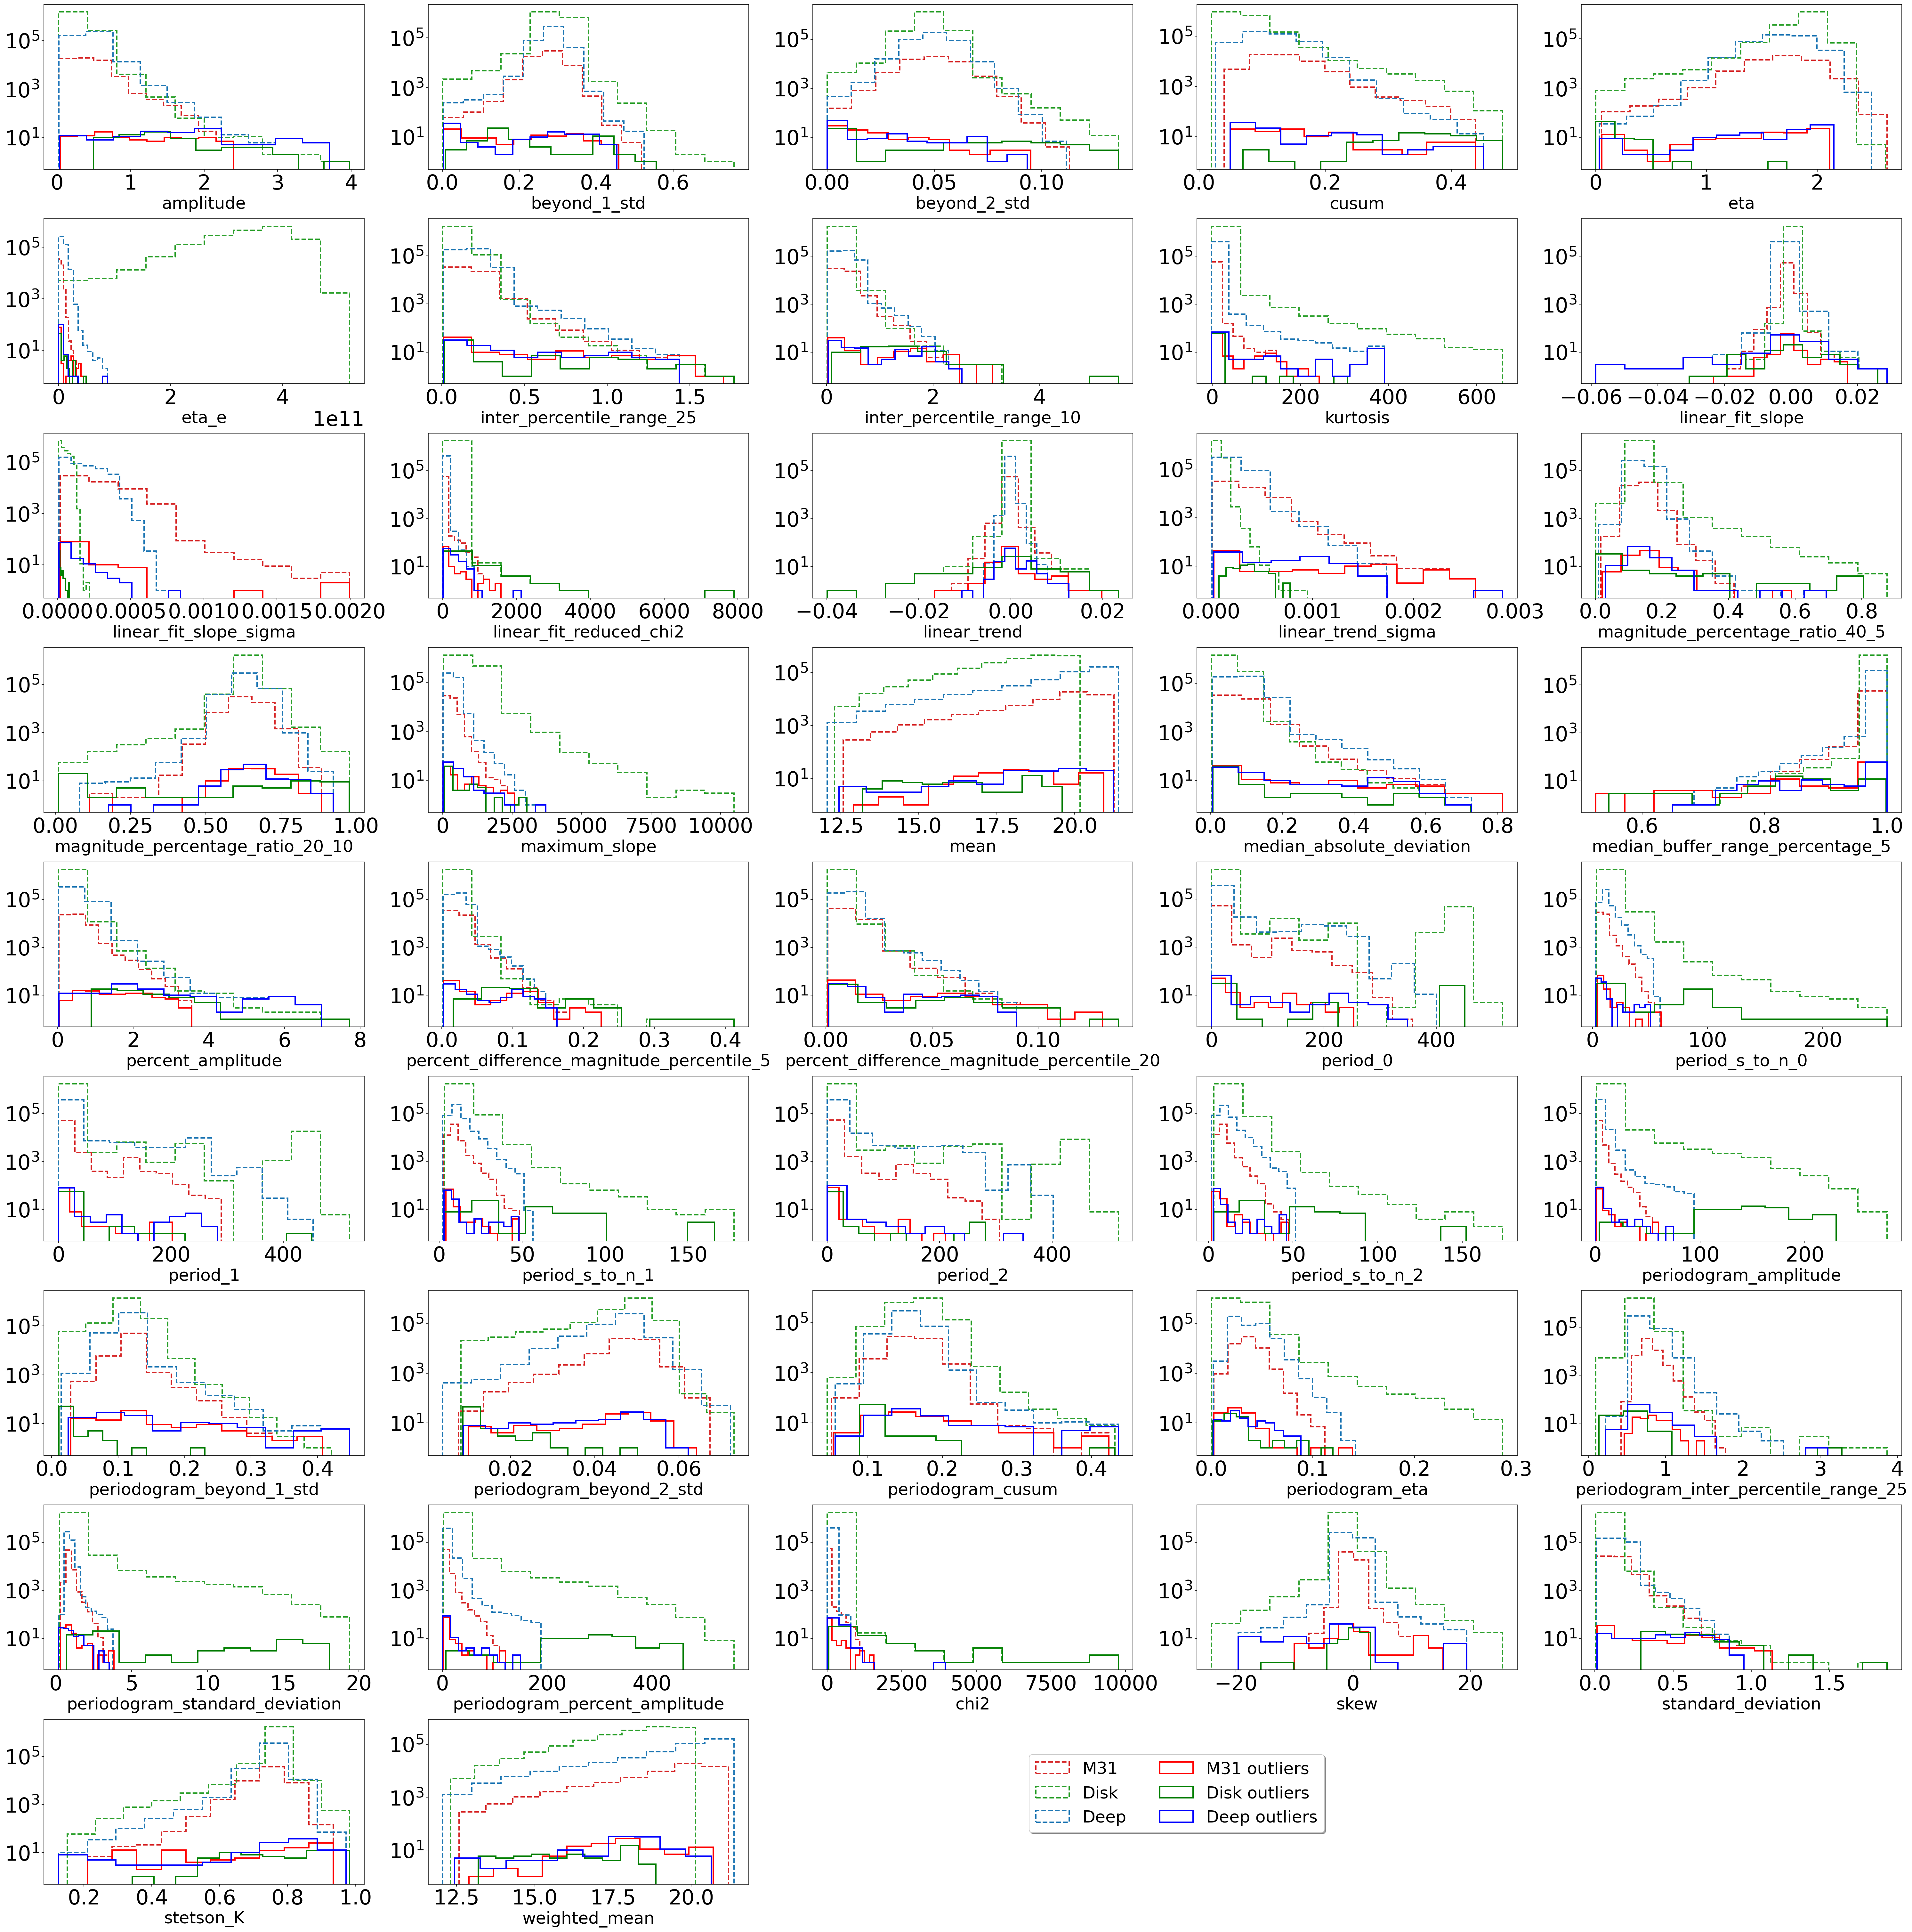

In [24]:
fig = plt.figure(figsize=(52, 54))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.rcParams.update({'font.size': 32})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='tab:red', 
             linestyle='dashed', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='tab:green', 
             linestyle='dashed', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='tab:blue', 
             linestyle='dashed', linewidth=2, label='Deep')
    plt.hist(m31_outliers_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 outliers')
    plt.hist(disk_outliers_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk outliers')
    plt.hist(deep_outliers_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep outliers')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(r'{}'.format(f), fontsize=26)
    ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')

plt.legend(loc='center left', bbox_to_anchor=(1.85, 0.55), ncol=2, fancybox=True, shadow=True, fontsize=26)

fig.tight_layout()
fig.savefig('../figs/histograms/all_features_histogram_outliers.png', format='png', bbox_inches='tight', dpi=300)